<a href="https://colab.research.google.com/github/cnn22/SingerSongwriter/blob/main/Sentece_Level_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 79 kB 5.5 MB/s 
     |████████████████████████████████| 4.0 MB 22.4 MB/s 
     |████████████████████████████████| 1.2 MB 42.7 MB/s 
     |████████████████████████████████| 77 kB 7.6 MB/s 
     |████████████████████████████████| 596 kB 42.3 MB/s 
     |████████████████████████████████| 895 kB 47.1 MB/s 
     |████████████████████████████████| 6.6 MB 28.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=538cbde2b85d8b1ed5ad7a72049fe04b626c77450b2c3941f4d1e0e72b4f857d
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import re 
import pickle
import string
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer

from gensim.models import KeyedVectors
from gensim.test.utils import datapath, get_tmpfile

#BERT Transformer

In [ ]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.76214680e-01  1.20601244e-01 -2.93623656e-01 -2.29858175e-01
 -8.22923258e-02  2.37709418e-01  3.39984953e-01 -7.80964255e-01
  1.18127748e-01  1.63373977e-01 -1.37715325e-01  2.40282550e-01
  4.25125420e-01  1.72417983e-01  1.05279736e-01  5.18163919e-01
  6.22217692e-02  3.99285674e-01 -1.81652233e-01 -5.85578561e-01
  4.49718237e-02 -1.72750458e-01 -2.68443525e-01 -1.47386208e-01
 -1.89217955e-01  1.92150652e-01 -3.83842438e-01 -3.96006942e-01
  4.30648804e-01 -3.15319955e-01  3.65949690e-01  6.05159141e-02
  3.57325703e-01  1.59736425e-01 -3.00984055e-01  2.63250053e-01
 -3.94311219e-01  1.84855491e-01 -3.99549305e-01 -2.67889798e-01
 -5.45117438e-01 -3.13403048e-02 -4.30644006e-01  1.33278385e-01
 -1.74793929e-01 -4.35465634e-01 -4.77379322e-01  7.12556615e-02
 -7.37002417e-02  5.69136977e-01 -2.82579601e-01  5.24975248e-02
 -8.20007861e-01  1.98296934e-01  1.69511735e-01  2.71780461e-01
  2.64611

#Emotional Lexicon Creator

In [ ]:
filepath = "https://raw.githubusercontent.com/sebastianruder/emotion_proposition_store/master/NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t', keep_default_na=False)

In [ ]:
emolex_words = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_words.drop(["negative", "positive", "trust"], axis=1, inplace=True)
emolex_words.head(20)

emotion,word,anger,anticipation,disgust,fear,joy,sadness,surprise
0,abacus,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,abandon,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,abandoned,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,abandonment,1.0,0.0,0.0,1.0,0.0,1.0,1.0
4,abate,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,abatement,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,abba,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,abbot,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,abbreviate,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,abbreviation,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_words.shape

(14181, 8)

### Creating dictionary of emotional words. Key = word, value = true or false 

In [ ]:
dictionary = {}
for idx, row in emolex_words.iterrows():
    isEmotionalWord = False
    for columnValue in row[2:]:
      if columnValue > 0.0:
        isEmotionalWord = True
        break
    dictionary[row["word"]] = isEmotionalWord

In [ ]:
with open('emotional_lexicon_dictionary.pickle', 'wb') as handle:
    pickle.dump(dictionary, handle)

# Get the emotional words in the sentence using the emotional lexicon

In [ ]:
with open('/content/drive/MyDrive/Star Data v2/emotional_lexicon_dictionary.pickle', 'rb') as handle:
    isEmotionalDict = pickle.load(handle)
    print(len(isEmotionalDict))

def cleanSentence(sentence):
  return sentence.translate(str.maketrans('','',string.punctuation))

def getEmotionalWords(sentence, isEmotionalDict):
  emotionalWords = []
  sentence = cleanSentence(sentence)
  for word in sentence.split():
    if (word, True) in isEmotionalDict.items():
      emotionalWords.append(word)
      print("added to emotional words", word)
  return emotionalWords


print(getEmotionalWords("It's making me sick, but we'll heal and the sun will rise", isEmotionalDict))

14181
added to emotional words sick
added to emotional words heal
added to emotional words sun
['sick', 'heal', 'sun']


# Downloading word2vec from gensim (only do this if you dont have the file on google drive)

In [ ]:
import gensim.downloader as api
path = api.load("word2vec-google-news-300", return_path=True)
print(path)

[==================================================] 100.0% 1662.8/1662.8MB downloaded
/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [ ]:
!gunzip /root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz

# Getting emotional word vector from Word2Vec

In [ ]:
wv_from_bin = KeyedVectors.load_word2vec_format(datapath("/content/drive/MyDrive/Star Data v2/gensim-data/word2vec-google-news-300/word2vec-google-news-300"), binary=True)

In [ ]:
def embedWords(wordList, word2vecModel):
  embeddedEmotionWords = []
  for word in wordList:
    wv_from_bin
    try:
      vector = word2vecModel[word]
      embeddedEmotionWords.append(vector)
    except: embeddedEmotionWords.append(None)
    
  return embeddedEmotionWords


In [ ]:
vector_w2v = embedWords(["python", "heal", "sick"], wv_from_bin)
len(vector_w2v)

3

# Getting Vemo from lexicon 

In [ ]:
filepath = "https://raw.githubusercontent.com/sebastianruder/emotion_proposition_store/master/NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t', keep_default_na=False)

In [ ]:
emolex_words = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_words.drop(["negative", "positive", "trust"], axis=1, inplace=True)
emolex_words.head(5)

emotion,word,anger,anticipation,disgust,fear,joy,sadness,surprise
0,abacus,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,abandon,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,abandoned,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,abandonment,1.0,0.0,0.0,1.0,0.0,1.0,1.0
4,abate,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import math

def transformDFtoDict(df):
  dictionary = {}
  for idx, row in df.iterrows():
    values = []
    for columnValue in row[1:]:
      # print(columnValue)
      if math.isnan(columnValue):
        values.append(0.0)
      else:
        values.append(columnValue)
    dictionary[row["word"]] = values
  return dictionary 

emoLexWords = transformDFtoDict(emolex_words)

In [ ]:
with open('emotional_values_dictionary.pickle', 'wb') as handle:
    pickle.dump(emoLexWords, handle)

In [ ]:
def embedWords(wordList, emoLexDict):
  embeddedEmotionWords = []
  for word in wordList: #loop through each word in wordList
    embeddedEmotionWords.append(emoLexDict.get(word))
  return embeddedEmotionWords

vector_emo = embedWords(["python", "heal", "sick"], emoLexWords)

AttributeError: ignored

In [ ]:
def combineVectors(vector_emo, vector_w2v):
  vector_final = []
  for idx, val1 in enumerate(vector_emo):
    val2 = vector_w2v[idx]
    if val1 is not None and val2 is not None:
      # print(len(val1))
      # print(len(val2))
      # print(len(np.concatenate((val1, val2))))
      vector_final.append(np.concatenate((val2, val1)))
  return vector_final


emotionalEmbedding = combineVectors(vector_emo, vector_w2v)

TODO READ THIS PLEASE

1.   Finish building emotionalFeatureRepresentation function, see below
2.   Pass it into GRU



# Creating emotional feature representation

In [1]:
import re 
import pickle
import string
import numpy as np
import pandas as pd
import tensorflow as tf
# from sentence_transformers import SentenceTransformer

from gensim.models import KeyedVectors
from gensim.test.utils import datapath, get_tmpfile


## Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Getting Emotional Words in a Sentence

In [3]:
with open('/content/drive/MyDrive/Star Data v2/emotional_lexicon_dictionary.pickle', 'rb') as handle:
    isEmotionalDict = pickle.load(handle)
    print(len(isEmotionalDict))

14181


In [4]:
def cleanSentence(sentence):
  return sentence.translate(str.maketrans('','',string.punctuation))

def getEmotionalWords(sentence, isEmotionalDict):
  emotionalWords = []
  sentence = cleanSentence(sentence)
  for word in sentence.split():
    if (word, True) in isEmotionalDict.items():
      emotionalWords.append(word)
  return emotionalWords


print(getEmotionalWords("It's making me sick, but we'll heal and the sun will rise", isEmotionalDict))

['sick', 'heal', 'sun']


## Getting word2vec represantation of a set of emotional words


In [5]:
#Reading the pre-trained word2vec by google
wv_from_bin = KeyedVectors.load_word2vec_format(datapath("/content/drive/MyDrive/Star Data v2/gensim-data/word2vec-google-news-300/word2vec-google-news-300"), binary=True)

In [6]:
def embedWordsUsingWord2Vec(wordList, word2vecModel):
  embeddedEmotionWords = []
  for word in wordList:
    try:
      vector = word2vecModel[word]
      embeddedEmotionWords.append(vector)
    except: embeddedEmotionWords.append(None)
    
  return embeddedEmotionWords

## Getting emotional lexicon vector for a set of emotional words

In [7]:
with open('/content/drive/MyDrive/Star Data v2/emotional_values_dictionary.pickle', 'rb') as handle:
    emoLexWords = pickle.load(handle)

In [8]:
def embedWordsUsingEmotionalLexicon(wordList, emoLexDict):
  embeddedEmotionWords = []
  for word in wordList: #loop through each word in wordList
    embeddedEmotionWords.append(emoLexDict.get(word))
  return embeddedEmotionWords

## Combining the word2vec vector and emotional vector

In [9]:
def combineVectors(vector_emo, vector_w2v):
  vector_final = []
  for idx, val1 in enumerate(vector_emo):
    val2 = vector_w2v[idx]
    if val1 is not None and val2 is not None:
      # print(len(val1))
      # print(len(val2))
      # print(len(np.concatenate((val1, val2))))
      vector_final.append(np.concatenate((val2, val1)))
  return vector_final

In [10]:
#write function to get isEmotionalDict 

#emotionalFeatureRepresentation takes in one sentence (str), 
#isEmotionalDict, which is a dictionary containing a word and true/false value,
#word2vecModel is a KeyedVector object (gensim.models.KeyedVectors)
#emoLexWordDict is a dictionary containing the word as a key and value as arrays of 0s and 1s for each emotion
def emotionalFeatureRepresentation(sentence, isEmotionalDict, word2vecModel, emoLexWordDict):
  print("Sentence to process: ", sentence)

  #1. Get emotional words from sentence
  emotional_words_in_sentence = getEmotionalWords(sentence,isEmotionalDict)
  print("Emotional Words: ",  emotional_words_in_sentence)

  #2. Get word2vec vector for emotional words in sentence
  vector_w2v = embedWordsUsingWord2Vec(emotional_words_in_sentence, wv_from_bin)
  print("Word2Vec Array Count:", len(vector_w2v))
  if len(vector_w2v) > 0: 
    print("Word2Vec Vector Count:", len(vector_w2v[0]))

  #3. Get emotional lexicon for emotional words sentence
  vector_emo = embedWordsUsingEmotionalLexicon(emotional_words_in_sentence, emoLexWords)
  print("Emotional Values Array Count:", len(vector_emo))
  if len(vector_emo) > 0: 
    print("Emotional Values Vector Count:", len(vector_emo[0]))
  
  #4. Merge the emotional vector and word2vec vector together
  emotionalEmbedding = combineVectors(vector_emo, vector_w2v)
  print("Combined Array Count:", len(emotionalEmbedding))
  if len(emotionalEmbedding) > 0: 
    print("Combined Vector Count:", len(emotionalEmbedding[0]))
  return emotionalEmbedding
  #5. GRU!!
  

#TODO: 
#GRU
  #recurrent_activation: sigmoid
  #activation: none
  #use_bias = True
  #maybe try using kernel_initializer instead of defining our own weights in Bidirectional

  #REFER TO CREATE_MODEL FUNCTION -> the accuracy is really bad because of BIGRU; figure out what's going on 06/03

#Bidirectional
  #weights - research how to find optimum weights; try without weights first (see kernel_initializer)

#Input Layer - e
#Hidden Layer - BIGRU
#Output Layer

In [39]:
#creates a simple sequential model

def create_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 307, input_shape=(3,307)),
    # tf.keras.layers.GRU(32, input_shape=(3,300)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32),input_shape=(3,307)),
    tf.keras.layers.Dense(307)
    ])


  model.compile(loss = tf.keras.losses.mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

  return model

In [40]:
test_model = create_model()

In [13]:
test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3, 307)            94556     
                                                                 
 bidirectional (Bidirectiona  (None, 64)               65472     
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 307)               19955     
                                                                 
Total params: 179,983
Trainable params: 179,983
Non-trainable params: 0
_________________________________________________________________


In [14]:
emotionalEmbedding = emotionalFeatureRepresentation("It's making me sick, but we'll heal and the sun will rise", 
                               isEmotionalDict, 
                               wv_from_bin,
                               emoLexWords)

Sentence to process:  It's making me sick, but we'll heal and the sun will rise
Emotional Words:  ['sick', 'heal', 'sun']
Word2Vec Array Count: 3
Word2Vec Vector Count: 300
Emotional Values Array Count: 3
Emotional Values Vector Count: 7
Combined Array Count: 3
Combined Vector Count: 307


In [15]:
# vector_emotion_words = np.array(vector_emotion_words) #[[300],[300],[300]]
# vector_emotions = np.array(vector_emotions) #[[7],[7],[7]]

In [16]:
# vector_emotion_words_flat = vector_emotion_words.reshape(-1,3,300)
# vector_emotions_flat = vector_emotions.reshape(-1,3,7)

In [41]:
emotionalEmbedding = np.array(emotionalEmbedding)
emotionalEmbedding_flat = emotionalEmbedding.reshape(1,3,307)

In [42]:
emotionalEmbedding_flat.shape

(1, 3, 307)

In [44]:
test_model.fit(emotionalEmbedding_flat, emotionalEmbedding_flat, batch_size = 100)

1/1 [==============================] - 5s 5s/step - loss: 0.0368 - accuracy: 0.0000e+00


# BiGru in Sentence Level Encoder
* The purpose of this model to give weights to the emotional words within a sentence so that the model can pay more or less attention to certain emotional words
* Example Output: [weight1 * "sun", weight2 * "heal", weight3 * "sick"]
** Noted that the words "sun", "heal", and "sick" are suppose to be their vector represantion 
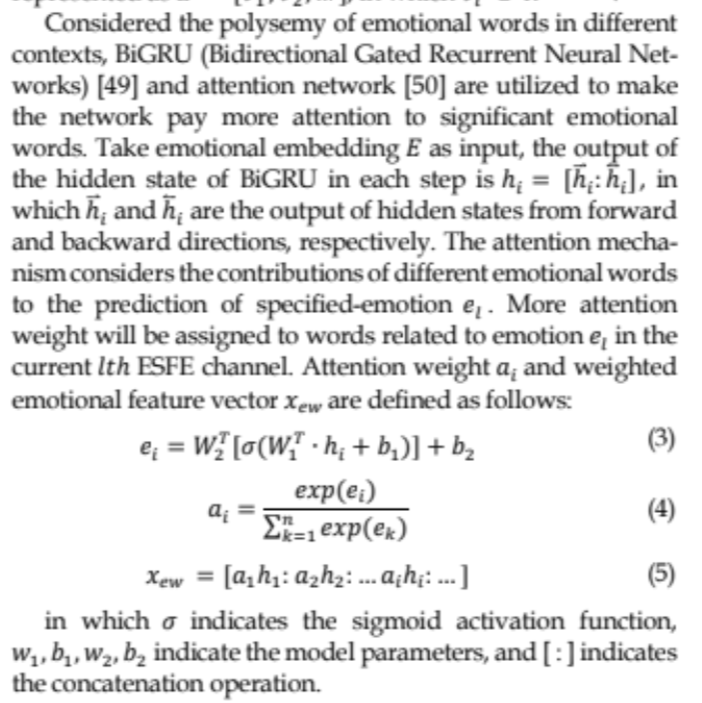

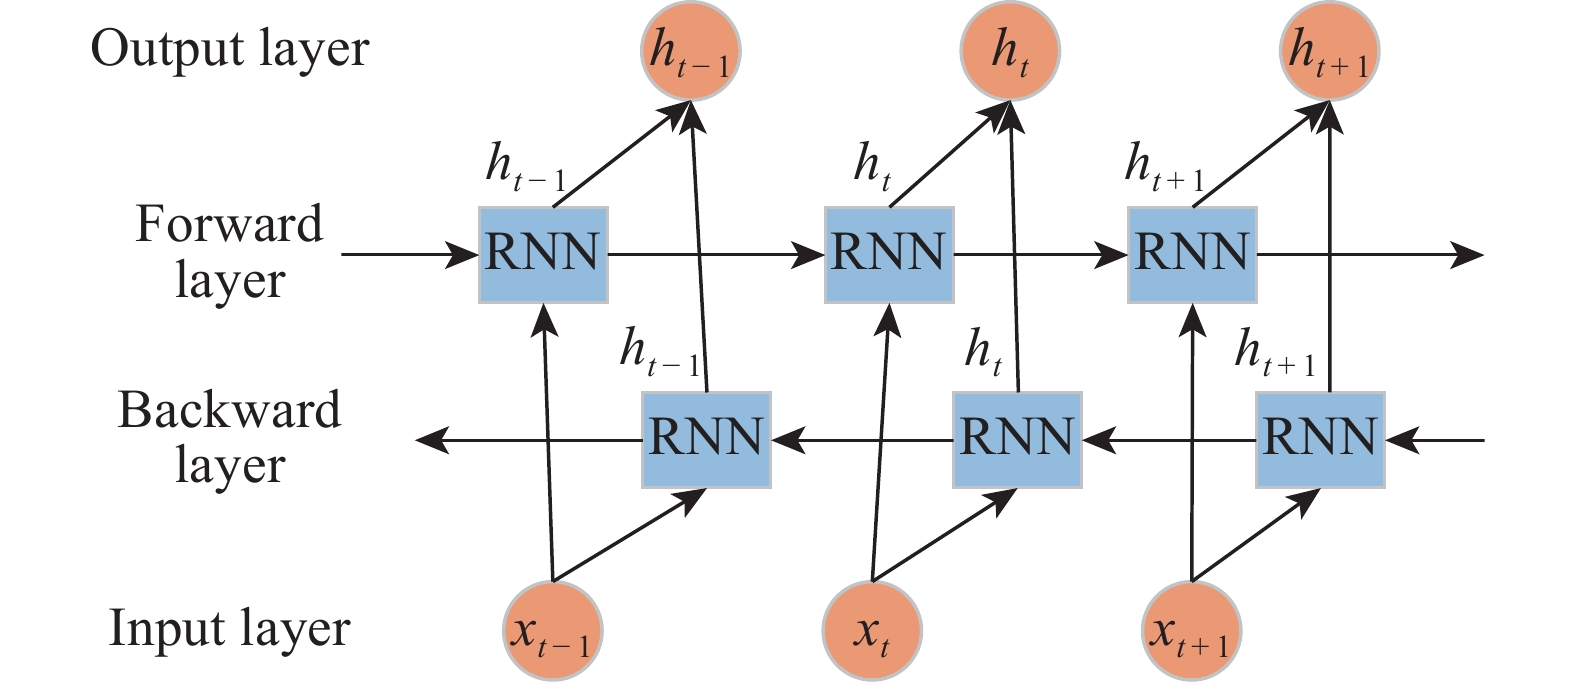 

# TODO (written June 10th)
* On june 10th we re-read the paper and have more clarity on the Sentence Level Encoder's BiGru
* Decided to pass in the 307 matrix into the BiGru with no target value at the moment
* Next meeting we should figure out what the target value should be and how to arrange the layers in the model

# TODO (written June 17h)
* Got more clarity on the Attention mechanism used on this portion of the paper
* Essentially trying to get the Context Vector 
* Key Words: RnnEncoderDecoder, seq2seq, Context Vector, Attention Mechanism
* Find a way to get a context vector since she only wants that and not really the final product of an RNN
* Use an existing model to get the context vector rather than creating our own 
* Bahdanau: https://arxiv.org/pdf/1409.0473.pdf
* https://www.analyticsvidhya.com/blog/2019/11/comprehensive-guide-attention-mechanism-deep-learning/
* Seq2Seq: https://towardsdatascience.com/day-1-2-attention-seq2seq-models-65df3f49e263#:~:text=A%20Seq2Seq%20model%20is%20a,the%20translated%20series%20of%20words
* https://medium.com/analytics-vidhya/attention-mechanism-in-deep-neural-network-simplified-6b3142b1be78